In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
train_df = pd.read_csv("train_titanic.csv")
test_df = pd.read_csv("test_titanic.csv")

combine = [train_df, test_df]

In [3]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

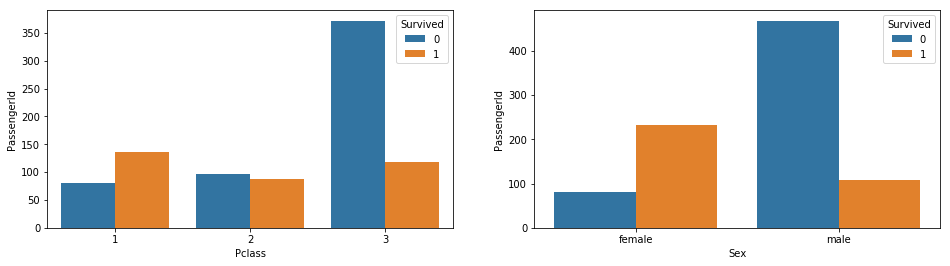

In [5]:
train_df[train_df.Survived == 1]
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
df_pclass = train_df.groupby(['Pclass', 'Survived'], as_index=False).count()
sns.barplot(x = 'Pclass', y='PassengerId', hue='Survived', data=df_pclass, ci="sd", ax=ax1)

# For sex
df_sex = train_df.groupby(['Sex', 'Survived'], as_index=False).count()
sns.barplot(x = 'Sex', y='PassengerId', hue='Survived', data=df_sex, ci="sd", ax=ax2)

In [7]:
result = pd.DataFrame(columns=['PassengerId', 'Survived'])
result.PassengerId = test_df.PassengerId

In [10]:
train_data = train_df.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
test_data = test_df.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)

In [13]:
train_data.Sex = train_data.Sex.map({'female': 0, 'male': 1})
test_data.Sex = test_data.Sex.map({'female': 0, 'male': 1})

In [14]:
train_data.fillna(train_data.mean(), inplace=True)
train_data.fillna(train_data.mean(), inplace=True)

In [15]:
trainY = train_data.Survived
trainX = train_data.drop('Survived', axis=1)

In [16]:
C=[]
for i in range(len(C)):
    for j in range(len(C)):
        svc = SVC(C=C[i], gamma=C[j])
        svc.fit(trainX, trainY)
        scores = cross_val_predict(svc, trainX, trainY, cv=10)
        print("C=%s Gamma=%s Score=%s" % (C[i], C[j],accuracy_score(trainY, scores)))
svc = SVC(C=10, gamma=0.01)
svc.fit(trainX, trainY)
predY = svc.predict(trainX)
print("SVC Score = " + str(accuracy_score(trainY, predY)))
result.Survived = svc.predict(test_data)

SVC Score = 0.7968574635241302


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').